In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv('/content/drive/My Drive/title_basics.tsv',encoding='utf-8',delimiter='\t')
print (df.head())

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


      tconst titleType  ... runtimeMinutes                    genres
0  tt0000001     short  ...              1         Documentary,Short
1  tt0000002     short  ...              5           Animation,Short
2  tt0000003     short  ...              4  Animation,Comedy,Romance
3  tt0000004     short  ...             12           Animation,Short
4  tt0000005     short  ...              1              Comedy,Short

[5 rows x 9 columns]


In [ ]:
df.columns

Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'endYear', 'runtimeMinutes', 'genres'],
      dtype='object')

In [ ]:
df['primaryTitle'].head()

0                Carmencita
1    Le clown et ses chiens
2            Pauvre Pierrot
3               Un bon bock
4          Blacksmith Scene
Name: primaryTitle, dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7014631 entries, 0 to 7014630
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         int64 
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: int64(1), object(8)
memory usage: 481.7+ MB


In [4]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7014608 entries, 0 to 7014630
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         int64 
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: int64(1), object(8)
memory usage: 535.2+ MB


In [ ]:
df['startYear'].value_counts()[:20]

\N      566983
2017    369929
2018    367084
2016    353786
2015    337757
2019    334165
2014    323607
2013    306581
2012    285799
2011    256600
2010    224723
2009    198409
2008    188748
2007    174875
2020    161459
2006    158261
2005    142555
2004    127766
2003    110597
2002     98843
Name: startYear, dtype: int64

In [5]:
df = df[df['startYear']!='\\N']

In [ ]:
df.shape

(6447638, 9)

In [ ]:
df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [6]:
df['startYear'] = df['startYear'].map(int)

In [7]:
df = df[(df['startYear']>1990) & (df['startYear']<2030)]
df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
15494,tt0015724,movie,Dama de noche,Dama de noche,0,1993,\N,102,"Drama,Mystery,Romance"
16664,tt0016906,movie,Frivolinas,Frivolinas,0,2014,\N,80,"Comedy,Musical"
18039,tt0018295,short,El puño de hierro,El puño de hierro,0,2004,\N,40,"Action,Drama,Short"
33814,tt0034413,short,Youth Gets a Break,Youth Gets a Break,0,2001,\N,20,Short
34814,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,\N,118,"Comedy,Fantasy,Romance"


(array([ 45452.,  46295.,  50381.,  55018.,  62589.,  66246.,  70317.,
         79340.,  83803.,  86105.,  95008.,  98843., 110597., 127767.,
        142555., 158261., 174875., 188748., 198409., 224724., 256599.,
        285799., 306581., 323609., 337755., 353785., 369929., 367083.,
        334164., 165934.]),
 array([1991., 1992., 1993., 1994., 1995., 1996., 1997., 1998., 1999.,
        2000., 2001., 2002., 2003., 2004., 2005., 2006., 2007., 2008.,
        2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016., 2017.,
        2018., 2019., 2020., 2021.]),
 <a list of 30 Patch objects>)

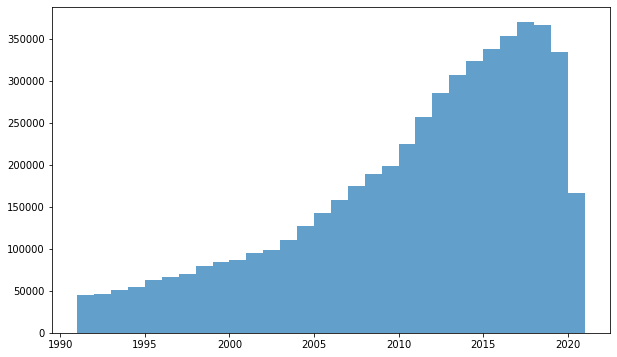

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(df['startYear'],alpha=0.7,range=(1991,2021),bins=30)

In [8]:
df = df.drop(['originalTitle','endYear'],axis=1)
df.head()

,tconst,titleType,primaryTitle,isAdult,startYear,runtimeMinutes,genres
15494,tt0015724,movie,Dama de noche,0,1993,102,"Drama,Mystery,Romance"
16664,tt0016906,movie,Frivolinas,0,2014,80,"Comedy,Musical"
18039,tt0018295,short,El puño de hierro,0,2004,40,"Action,Drama,Short"
33814,tt0034413,short,Youth Gets a Break,0,2001,20,Short
34814,tt0035423,movie,Kate & Leopold,0,2001,118,"Comedy,Fantasy,Romance"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5267198 entries, 15494 to 7014630
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   isAdult         int64 
 4   startYear       int64 
 5   runtimeMinutes  object
 6   genres          object
dtypes: int64(2), object(5)
memory usage: 321.5+ MB


In [10]:
temp = df.copy()
temp = temp[(temp['startYear']>2005) & (temp['startYear']<2020)]
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3880321 entries, 16664 to 7014630
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   isAdult         int64 
 4   startYear       int64 
 5   runtimeMinutes  object
 6   genres          object
dtypes: int64(2), object(5)
memory usage: 236.8+ MB


In [11]:
#df.to_csv('/content/drive/My Drive/title_basics_cleaned.csv')
temp.to_csv('/content/drive/My Drive/title_basics_cleaned_2006_to_2019.csv')